In [5]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [6]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
train_loader_simclr = train_loader_simclr("CIFAR10",128)
test_loader = test_loader("CIFAR10",128)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [9]:
proj_dim = 64
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(128,0.5)
optimizer = "LARS"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,128,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS128-PD64-LARS")

/home/ky2446/simclr/simclr/optim/LARS.py:136: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272178570/work/torch/csrc/utils/python_arg_parser.cpp:1050.)
  next_v.mul_(momentum).add_(scaled_lr, grad)


Epoch: 0, step: 50/390, loss: 5.5236897468566895
Epoch: 0, step: 100/390, loss: 5.487666606903076
Epoch: 0, step: 150/390, loss: 5.417148113250732
Epoch: 0, step: 200/390, loss: 5.414841175079346
Epoch: 0, step: 250/390, loss: 5.286598205566406
Epoch: 0, step: 300/390, loss: 5.263472557067871
Epoch: 0, step: 350/390, loss: 5.256021499633789
Epoch: 0 completed, average loss: 5.388765483024793, time taken: 1.2489370783170064 mins
Epoch: 1, step: 50/390, loss: 5.26734733581543
Epoch: 1, step: 100/390, loss: 5.202791213989258
Epoch: 1, step: 150/390, loss: 5.051806926727295
Epoch: 1, step: 200/390, loss: 4.997483253479004
Epoch: 1, step: 250/390, loss: 5.067628383636475
Epoch: 1, step: 300/390, loss: 5.005070209503174
Epoch: 1, step: 350/390, loss: 5.068957805633545
Epoch: 1 completed, average loss: 5.09955559632717, time taken: 1.2373284578323365 mins
Epoch: 2, step: 50/390, loss: 4.855103015899658
Epoch: 2, step: 100/390, loss: 4.977836608886719
Epoch: 2, step: 150/390, loss: 4.917750835

Epoch: 19, step: 50/390, loss: 4.333194255828857
Epoch: 19, step: 100/390, loss: 4.303407669067383
Epoch: 19, step: 150/390, loss: 4.357954025268555
Epoch: 19, step: 200/390, loss: 4.291777610778809
Epoch: 19, step: 250/390, loss: 4.295620918273926
Epoch: 19, step: 300/390, loss: 4.267016410827637
Epoch: 19, step: 350/390, loss: 4.246235370635986
Epoch: 19 completed, average loss: 4.288224400006808, time taken: 1.2255149245262147 mins
Epoch: 20, step: 50/390, loss: 4.30279016494751
Epoch: 20, step: 100/390, loss: 4.261544704437256
Epoch: 20, step: 150/390, loss: 4.2400221824646
Epoch: 20, step: 200/390, loss: 4.301126956939697
Epoch: 20, step: 250/390, loss: 4.317422866821289
Epoch: 20, step: 300/390, loss: 4.305448532104492
Epoch: 20, step: 350/390, loss: 4.238007068634033
Epoch: 20 completed, average loss: 4.279359535070566, time taken: 1.2371826171875 mins
Epoch: 21, step: 50/390, loss: 4.31368350982666
Epoch: 21, step: 100/390, loss: 4.310059547424316
Epoch: 21, step: 150/390, loss

Epoch: 37 completed, average loss: 4.1917499921260735, time taken: 1.2511035879453023 mins
Epoch: 38, step: 50/390, loss: 4.1567864418029785
Epoch: 38, step: 100/390, loss: 4.168855667114258
Epoch: 38, step: 150/390, loss: 4.1726460456848145
Epoch: 38, step: 200/390, loss: 4.100926876068115
Epoch: 38, step: 250/390, loss: 4.173773765563965
Epoch: 38, step: 300/390, loss: 4.221100807189941
Epoch: 38, step: 350/390, loss: 4.284441947937012
Epoch: 38 completed, average loss: 4.184200447033613, time taken: 1.2450032273928324 mins
Epoch: 39, step: 50/390, loss: 4.182503700256348
Epoch: 39, step: 100/390, loss: 4.1976118087768555
Epoch: 39, step: 150/390, loss: 4.164790153503418
Epoch: 39, step: 200/390, loss: 4.256186485290527
Epoch: 39, step: 250/390, loss: 4.2018303871154785
Epoch: 39, step: 300/390, loss: 4.129281044006348
Epoch: 39, step: 350/390, loss: 4.187022686004639
Epoch: 39 completed, average loss: 4.180945930725489, time taken: 1.2383747895558674 mins
Epoch: 40, step: 50/390, lo

Epoch: 56, step: 300/390, loss: 4.174581050872803
Epoch: 56, step: 350/390, loss: 4.232471466064453
Epoch: 56 completed, average loss: 4.142157862736629, time taken: 1.2455225785573323 mins
Epoch: 57, step: 50/390, loss: 4.247365474700928
Epoch: 57, step: 100/390, loss: 4.176023960113525
Epoch: 57, step: 150/390, loss: 4.128321647644043
Epoch: 57, step: 200/390, loss: 4.089940071105957
Epoch: 57, step: 250/390, loss: 4.050230503082275
Epoch: 57, step: 300/390, loss: 4.184368133544922
Epoch: 57, step: 350/390, loss: 4.152312755584717
Epoch: 57 completed, average loss: 4.143266691305699, time taken: 1.2542420744895935 mins
Epoch: 58, step: 50/390, loss: 4.148935794830322
Epoch: 58, step: 100/390, loss: 4.10255765914917
Epoch: 58, step: 150/390, loss: 4.201713562011719
Epoch: 58, step: 200/390, loss: 4.155097484588623
Epoch: 58, step: 250/390, loss: 4.132171630859375
Epoch: 58, step: 300/390, loss: 4.155112266540527
Epoch: 58, step: 350/390, loss: 4.165975570678711
Epoch: 58 completed, av

Epoch: 75, step: 200/390, loss: 4.111523628234863
Epoch: 75, step: 250/390, loss: 4.099319934844971
Epoch: 75, step: 300/390, loss: 4.1786298751831055
Epoch: 75, step: 350/390, loss: 4.094292640686035
Epoch: 75 completed, average loss: 4.118894663835183, time taken: 1.2424487034479776 mins
Epoch: 76, step: 50/390, loss: 4.1318464279174805
Epoch: 76, step: 100/390, loss: 4.1148271560668945
Epoch: 76, step: 150/390, loss: 4.07611083984375
Epoch: 76, step: 200/390, loss: 4.044900417327881
Epoch: 76, step: 250/390, loss: 4.1389594078063965
Epoch: 76, step: 300/390, loss: 4.118706226348877
Epoch: 76, step: 350/390, loss: 4.167004108428955
Epoch: 76 completed, average loss: 4.111008026661017, time taken: 1.2475350975990296 mins
Epoch: 77, step: 50/390, loss: 4.1626386642456055
Epoch: 77, step: 100/390, loss: 4.1549248695373535
Epoch: 77, step: 150/390, loss: 4.034831523895264
Epoch: 77, step: 200/390, loss: 4.101157188415527
Epoch: 77, step: 250/390, loss: 4.089541912078857
Epoch: 77, step: 

Epoch: 94, step: 100/390, loss: 4.133927822113037
Epoch: 94, step: 150/390, loss: 4.058808326721191
Epoch: 94, step: 200/390, loss: 4.063349723815918
Epoch: 94, step: 250/390, loss: 4.043528079986572
Epoch: 94, step: 300/390, loss: 4.155205726623535
Epoch: 94, step: 350/390, loss: 4.093261241912842
Epoch: 94 completed, average loss: 4.09501915772756, time taken: 1.235565733909607 mins
Epoch: 95, step: 50/390, loss: 4.053122520446777
Epoch: 95, step: 100/390, loss: 4.117760181427002
Epoch: 95, step: 150/390, loss: 4.054052829742432
Epoch: 95, step: 200/390, loss: 4.082150936126709
Epoch: 95, step: 250/390, loss: 4.0927276611328125
Epoch: 95, step: 300/390, loss: 4.079148769378662
Epoch: 95, step: 350/390, loss: 4.022195339202881
Epoch: 95 completed, average loss: 4.092867634235284, time taken: 1.2381519516309103 mins
Epoch: 96, step: 50/390, loss: 4.111600875854492
Epoch: 96, step: 100/390, loss: 4.093017101287842
Epoch: 96, step: 150/390, loss: 4.060744762420654
Epoch: 96, step: 200/39

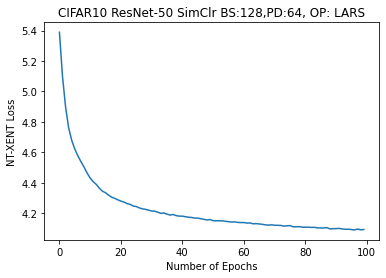

In [10]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:128,PD:64, OP: LARS")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS128-PD64-LARS.png")

In [11]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-BS128-PD64-LARS", "wb") as fp:   #Pickling
  pickle.dump(train_loss, fp)